In [28]:
import functions_new_jit as func
import importlib
importlib.reload(func)

###########################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output
import time

import numba

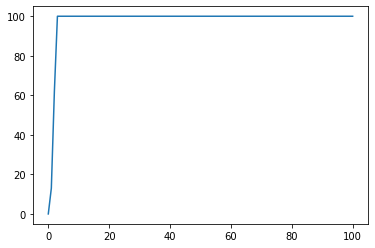

In [29]:
N = 100
average = 24
deviation = 12

agents = func.create_agents(N,average,deviation)

steps = 100

progression = func.simulate_riot_stochastic_exit(agents, steps)

plt.figure()
plt.plot(progression)
plt.ylim(-5,105)
plt.show()

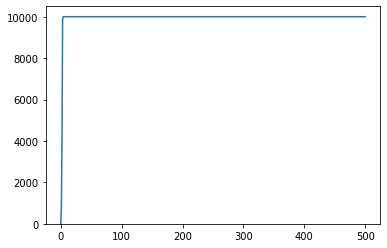

In [34]:
N = 10000
average = 24
deviation = 12

agents = func.create_agents(N,average,deviation)

steps = 500

progression, states = func.simulate_riot_stochastic_exit_intermediary(agents, steps)

plt.figure()
plt.plot(progression)
plt.ylim(-5,N+N/20)
plt.show()

In [35]:
thresholds = np.zeros(len(agents))

for i in range(len(agents)):
    thresholds[i] = agents[i].threshold
    
thresholds = sorted(thresholds)
#print(thresholds)

threshs = np.linspace(0,101, 102,endpoint = True)

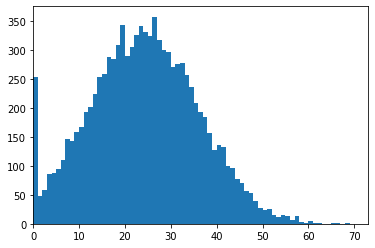

In [36]:
plt.figure()
plt.hist(thresholds,threshs)
plt.xlim(0,thresholds[-1] + 5)
plt.show()

23.7043


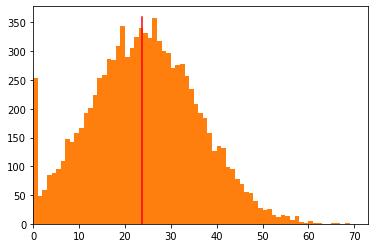

100.0


In [46]:
passo = 1
for i in range(steps):
    if i%passo == 0:
        
        soma = 0
        for j in range(len(states[0])):
            if states[i][j] != -1:
                soma += states[i][j]
        media = soma/progression[i]
        print(media)
        
        plt.figure()
        plt.hist(thresholds,threshs)
        plt.hist(states[i], threshs)
        plt.xlim(0,thresholds[-1] + 5)
        plt.plot([int(progression[i]/N * 100) + 1,int(progression[i]/N * 100) + 1],[0,360])
        plt.plot([media,media],[0,360],'r')
        plt.show()
        
        print(progression[i]/N * 100)
        clear_output(wait=True)
        time.sleep(2)
        if progression[i] == N:
            break